In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [6]:
#read the data

df = pd.read_csv('/content/Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# see column data type and some info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

In [37]:
# create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = df, hue = hue, order = df[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [38]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = df, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [32]:
# see uniqie values

df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

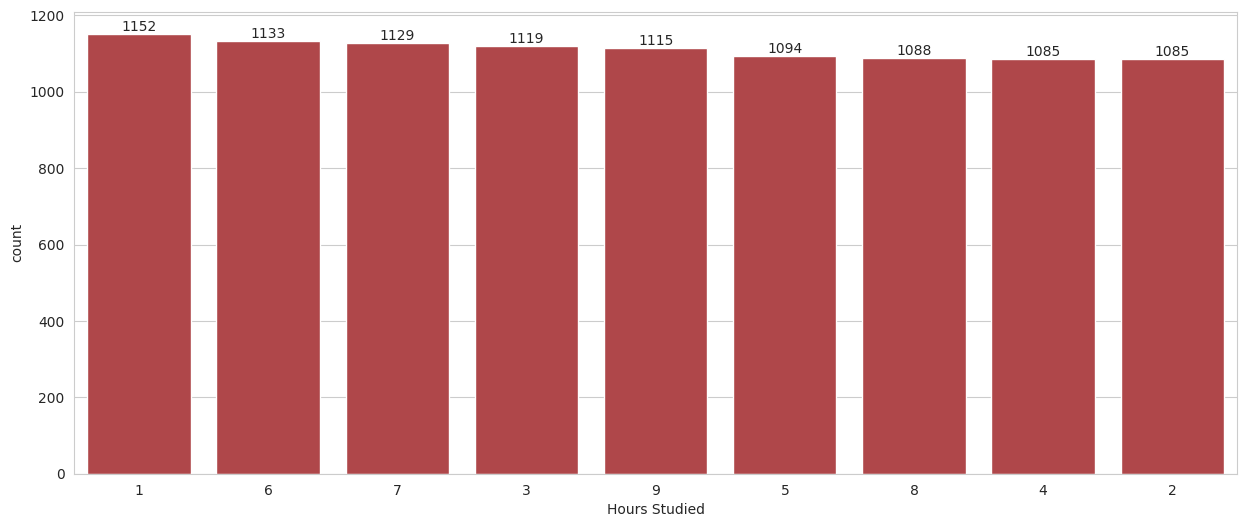

In [39]:
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Hours Studied")

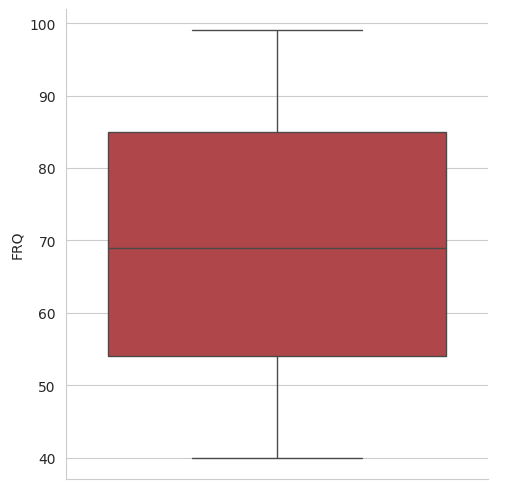

In [40]:
# see distribution

box_plot(y_axis = "Previous Scores") # call function i create it in cell 11

In [42]:
# see unique values

df["Extracurricular Activities"].unique()

array([1, 0])

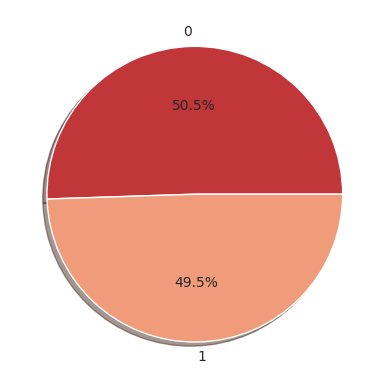

In [45]:
# output number of values count

plt.pie(df["Extracurricular Activities"].value_counts(), labels = df["Extracurricular Activities"].value_counts().index,
        shadow = True, autopct = "%1.1f%%")
plt.show()

In [47]:
# see unique values

df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6])

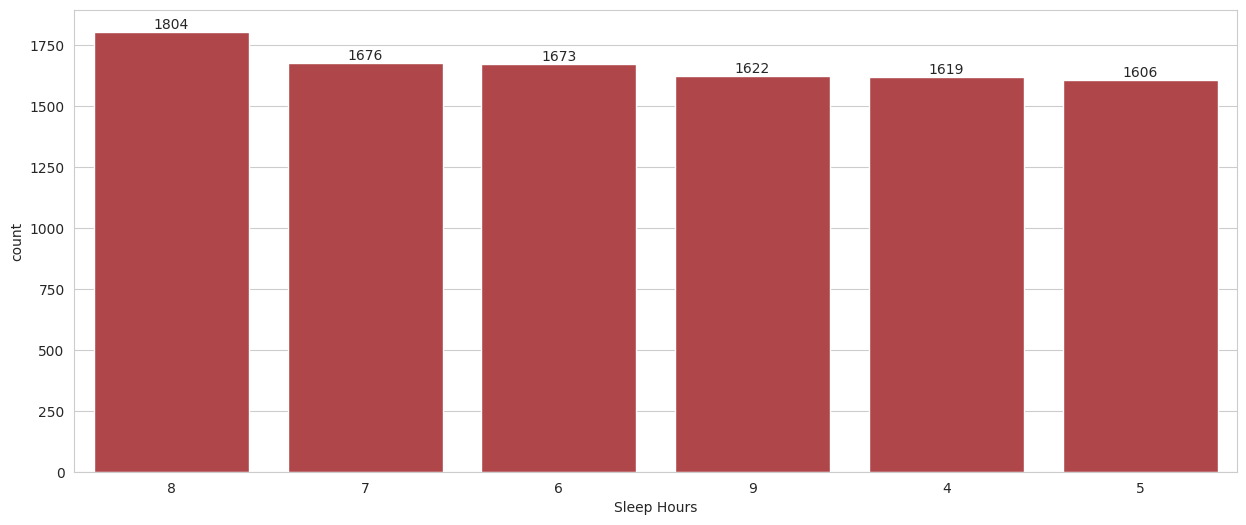

In [48]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Sleep Hours")

In [50]:
# see unique values

df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7])

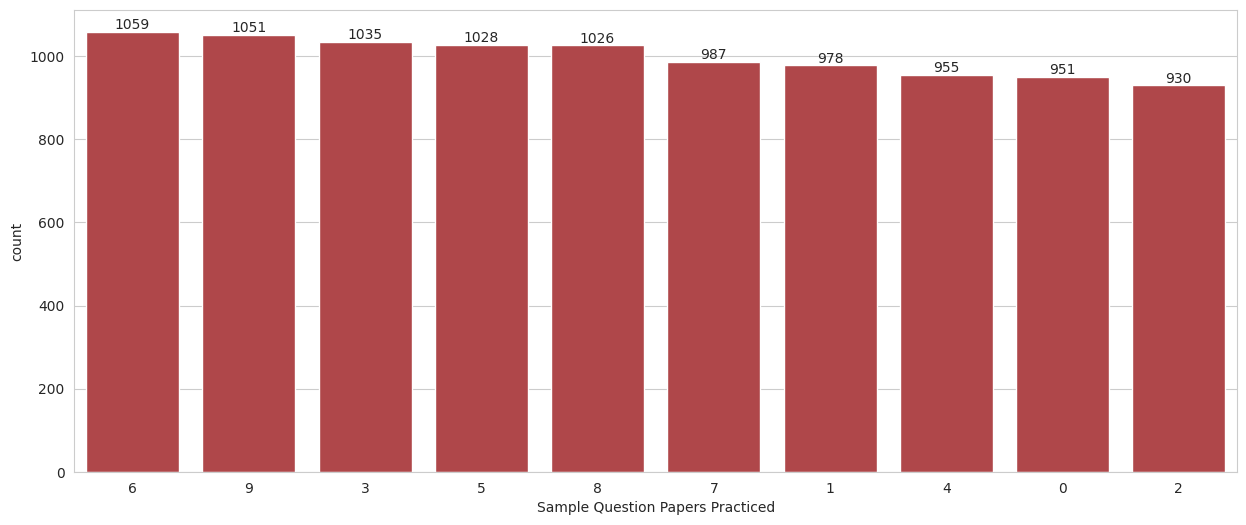

In [51]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Sample Question Papers Practiced")

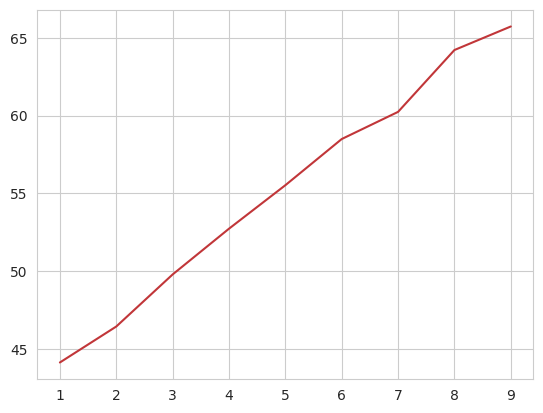

In [52]:
# What is "Hours Studied" and "Performance Index" distribution

avg_performance_by_hours = df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

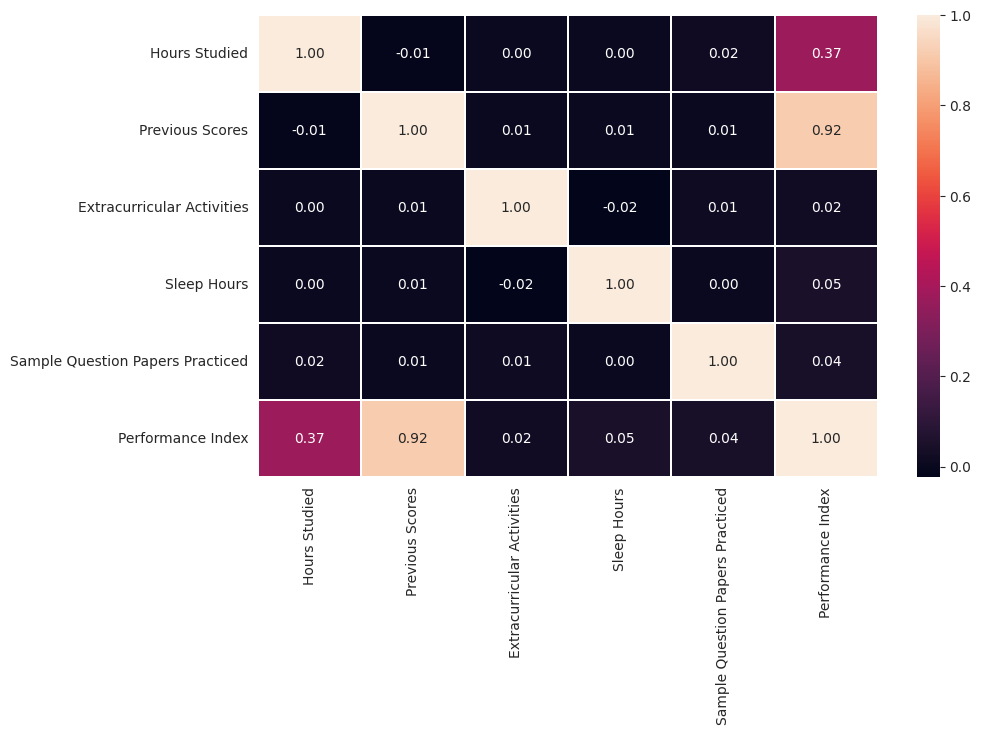

In [54]:
# first visualize correlation matrix between numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

**Modeling using Linear Regression**

In [2]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [7]:
# create object from labelencoder

encoder = LabelEncoder()

df["Extracurricular Activities"] =  encoder.fit_transform(df["Extracurricular Activities"])

In [8]:
df["Extracurricular Activities"]

,Extracurricular Activities
0,1
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [11]:
# see sample of data

df.sample(4)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8017,2,94,0,7,3,73.0
6318,7,69,0,9,3,57.0
9555,5,86,1,6,7,72.0
3768,6,83,1,4,6,69.0


In [13]:
# Splitting data into Independent and Dependent Variable

X = df.drop(columns = "Performance Index")
y = df["Performance Index"]

In [14]:
# see sample of X_train

X.sample(4)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
1707,2,81,0,8,4
8314,4,44,0,7,5
9746,2,49,0,6,6
712,7,43,0,5,3


In [15]:
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

This line is where the machine learning model is trained. The .fit() method is used to train the LinearRegression model (model) using the training data.

In [20]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.9886898790682355

In [21]:
# see predicted values

predict = model.predict(X_test)


In [23]:
# Real Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.711854
4684,20.0,22.615513
1731,46.0,47.903145
4742,28.0,31.289767
4521,41.0,43.004570
...,...,...
6412,45.0,46.886280
8285,66.0,62.698025
7853,16.0,16.793420
1095,65.0,63.343274


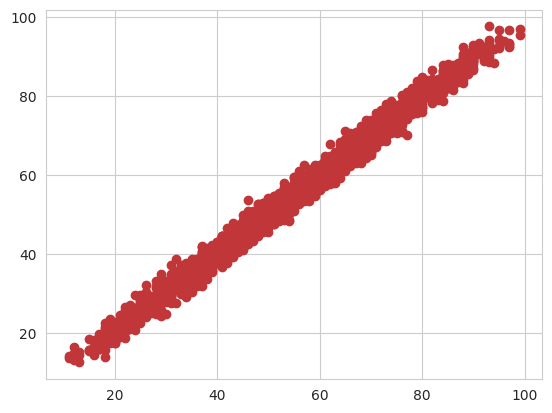

In [24]:
# Create scatter plot to see distribution

plt.scatter(y_test, predict)
plt.show()

In [25]:
# see mean absolute error

mean_absolute_error(y_test,predict)


1.6111213463123044

In [26]:
# see score

r2_score(y_test,predict)

0.9889832909573145

In [27]:
# see coefficients values

model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [28]:
# see y intercept

model.intercept_

np.float64(-33.92194621555638)